# CBT Nuggets Project - Duplicate for Validation
This Jupyter Notebook is where work is done to import the Slack data export and find the answers to the given questions: 

- What channel had the most posts per week/month? (filter out non manual entries, do both peak week/month from total dataset and average for each channel)
- What's the average number of posts per user in a week/month? 
- Which user had the highest number of posts in a single week (and how many was it)?
- Which user had the highest number of posts in a single month (and how many was it)?
- Which user had the highest number of posts the most recent full month in the 'general-discussion' channel (and how many was it)?

This notebook is a duplicate of what will be submitted. The purpose is to make sure no mistakes were made. 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, isdir, join


In [2]:
# the directory is the unzipped slack data export
directory = 'CBT Learners Slack export Mar 21 2018/'
# the subdirectories are all the folders referencing each channel in the Slack group
subdirectories = [folder for folder in listdir(directory) if isdir(join(directory, folder))]

In [3]:
# we will pull in all the data from each channel and concatenate it into one dataframe. We will also add a 'channel'
# column to preserve where each message came from. 

# we will first initialize df as an empty dataframe
df = pd.DataFrame(columns = ['channel'])
# next we will do a for loop to import all the files from each channel and append to df
for subdir in subdirectories:
    mypath = directory + subdir
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    value = pd.concat([pd.read_json(mypath + '/' + file) for file in onlyfiles], ignore_index=True)
    value['channel'] = subdir
    df = df.append(value)
    

In [4]:
list(df)

['attachments',
 'bot_id',
 'channel',
 'channel_id',
 'client_msg_id',
 'comment',
 'display_as_bot',
 'edited',
 'file',
 'hidden',
 'icons',
 'inviter',
 'is_intro',
 'is_multiteam',
 'is_thread_broadcast',
 'item',
 'item_type',
 'members',
 'name',
 'new_broadcast',
 'old_name',
 'parent_user_id',
 'plain_text',
 'purpose',
 'reactions',
 'replies',
 'reply_count',
 'root',
 'slog_is_mpdm',
 'slog_is_self_dm',
 'slog_is_shared',
 'slog_is_slackbot_dm',
 'subtype',
 'text',
 'thread_ts',
 'timestamp',
 'topic',
 'ts',
 'type',
 'unfurl_links',
 'unfurl_media',
 'unread_count',
 'upload',
 'upload_reply_to',
 'user',
 'username']

In [36]:
df[df['timestamp'].notnull()]

,attachments,bot_id,channel,channel_id,client_msg_id,comment,display_as_bot,edited,file,hidden,...,topic,ts,type,unfurl_links,unfurl_media,unread_count,upload,upload_reply_to,user,username
3705,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,watercooler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.494619e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
730,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,devops-learners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.493393e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
114,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.501536e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
281,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.502740e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
963,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.499440e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
973,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.499455e+09,message,NaN,NaN,NaN,NaN,NaN,U0SAVF56U,NaN
1438,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.505760e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
1447,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.499358e+09,message,NaN,NaN,NaN,NaN,NaN,U0N724M7A,NaN
1453,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.499372e+09,message,NaN,NaN,NaN,NaN,NaN,U0SAVF56U,NaN
1656,[{'from_url': 'https://cbtlearners.slack.com/a...,NaN,bulletin-board,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.495074e+09,message,NaN,NaN,NaN,NaN,NaN,U5ETQ502W,NaN


In [37]:
# okay, pulled all non NaN rows from each column. I don't think they contain anything other than what I expected.
# That is good. I think I can move on without missing anything

In [38]:
# to answer the questions, we don't need the entire dataset. We will keep only the relevant columns
df = df[['channel','subtype','ts','user']]
df.isnull().sum()

channel         0
subtype    132919
ts              0
user         1310
dtype: int64

In [39]:
df.describe(include='all')

,channel,subtype,ts,user
count,164709,31790,1.647090e+05,163399
unique,20,16,NaN,5697
top,cisco-learners,channel_join,NaN,U3UJH0PHP
freq,102045,26501,NaN,14548
mean,NaN,NaN,1.494945e+09,NaN
std,NaN,NaN,2.105553e+07,NaN
min,NaN,NaN,1.455325e+09,NaN
25%,NaN,NaN,1.476807e+09,NaN
50%,NaN,NaN,1.497040e+09,NaN
75%,NaN,NaN,1.515590e+09,NaN


the description of df shows that there are:

    164709 posts total between all channels
     31790 posts are automatically generated
    164709 posts have timestamps
    163399 posts were made by a real user (not a bot)
    
        20 unique channels
      5697 unique users

In [40]:
# we see that subtype and user have some null values. We need to fill these spaces

# for subtype, the null values are messages that were manually entered by the user. these are the only rows we want
df = df[df['subtype'].isnull()]
# we will drop 'subtype' as it is irrelevant now
df = df.drop('subtype', axis=1)

# check to make sure the dataset is now clean
df.isnull().sum() 

channel    0
ts         0
user       0
dtype: int64

In [41]:
df.describe(include='all')

,channel,ts,user
count,132919,1.329190e+05,132919
unique,17,NaN,1466
top,cisco-learners,NaN,U3UJH0PHP
freq,97753,NaN,14453
mean,NaN,1.497753e+09,NaN
std,NaN,2.025205e+07,NaN
min,NaN,1.455578e+09,NaN
25%,NaN,1.485427e+09,NaN
50%,NaN,1.501189e+09,NaN
75%,NaN,1.516309e+09,NaN


In [42]:
# Now each column has the same number of entries. it is cleaned and we can move forward. 

In [44]:
## Question 1: What channel had the most posts per week/month? (filter out non manual entries, do both peak week/month from total dataset and average for each channel)
# to answer the first question, we will add columns for 'week_number' and 'month'

# convert ts from seconds since epoch to a pandas datetime format
df['ts'] = pd.to_datetime(df['ts'],unit='s')
# week_number is the week number for a given year. This prevents week one from multiple years being summed. It is 
# in the format 'YYYY-w##' 
df['week_number'] = df['ts'].dt.strftime('%Y-w%W')
# month is the month number for a given year. This prevents month one from multiple years being summed. It is 
# in the format 'YYYY-m##' 
df['month'] = df['ts'].dt.strftime('%Y-m%m')

# calculate and print results
peak_week = df.groupby(['channel','week_number'])['ts'].count().idxmax()
print('the channel with the mosts weekly posts was {} on week {}'.format(peak_week[0],peak_week[1]))
peak_month = df.groupby(['channel','month'])['ts'].count().idxmax()
print('the channel with the mosts monthly posts was {} on month {}'.format(peak_month[0],peak_month[1]))

the channel with the mosts weekly posts was cisco-learners on week 2018-w05
the channel with the mosts monthly posts was cisco-learners on month 2018-m01


In [45]:
df.describe(include='all')

,channel,ts,user,week_number,month
count,132919,132919,132919,132919,132919
unique,17,132919,1466,111,26
top,cisco-learners,2016-09-10 05:39:12.000100,U3UJH0PHP,2018-w05,2018-m01
freq,97753,1,14453,6518,22107
first,NaN,2016-02-15 23:11:28.000007,NaN,NaN,NaN
last,NaN,2018-03-21 15:46:24.000698,NaN,NaN,NaN


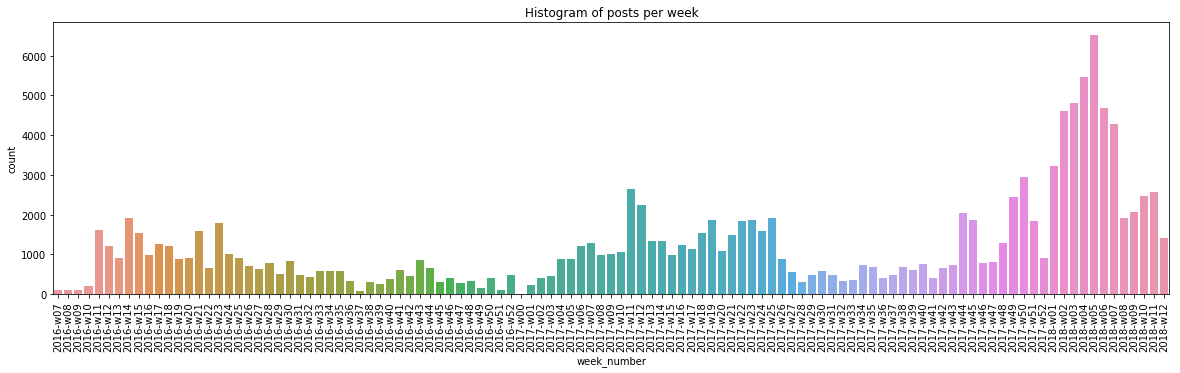

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(df['week_number'].sort_values())
plt.title('Histogram of posts per week')
plt.xticks(rotation=90)
plt.show()

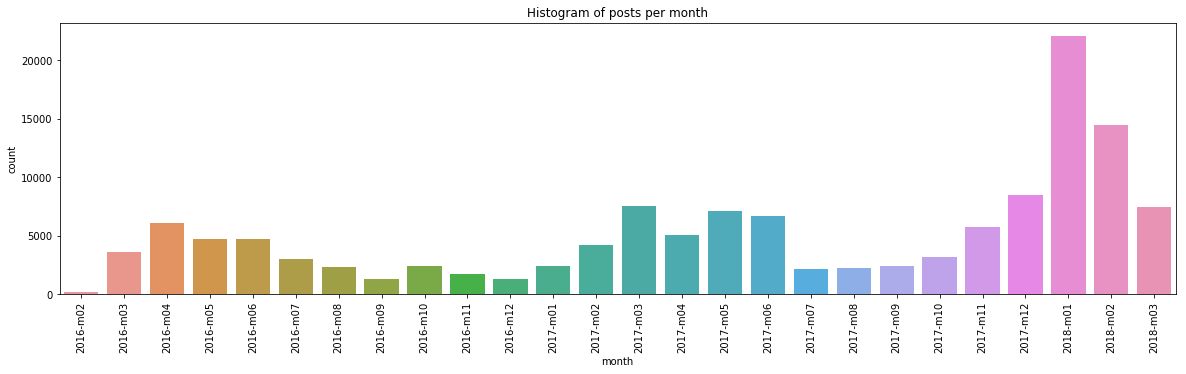

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(df['month'].sort_values())
plt.title('Histogram of posts per month')
plt.xticks(rotation=90)
plt.show()

In [9]:
# question 1 part 2 is calculating the average posts/(week and month) for each channel. We will calculate that here

# calculate the total posts for each channel
channels_total_posts = df.groupby(['channel'])['ts'].count()
# calculate the start date of each channel
channels_start = df.groupby(['channel'])['ts'].min()
# pull the last timestamp, this is the "present"
channel_end = df['ts'].max()
# calculate each channel's age in weeks
channels_age_weeks = (channel_end - channels_start)/ np.timedelta64(1, 'W')
# calculate each channel's age in months
channels_age_months = (channel_end - channels_start)/ np.timedelta64(1, 'M')

# calculate and print the average posts per week for all channels
print('the average posts per week for each {}'.format(channels_total_posts/channels_age_weeks))
# calculate and print the average posts per month for all channels
print('\nthe average posts per month for each {}'.format(channels_total_posts/channels_age_months))


the average posts per week for each channel
adc-loadbalancing         1.247278
aska-mentor              10.584902
bulletin-board           40.172578
cisco-learners          895.713611
cloud-learners            3.249679
comptia-learners         11.513307
devops-learners           2.006461
general-discussion      110.938746
it-job-career            14.532846
juniper-learners          2.484534
linux-learners           16.755240
microsoft-learners       60.191883
programmer-developer      1.048129
project-management        0.438852
security-learners        23.899480
vmware-learners          20.669603
watercooler              16.695577
Name: ts, dtype: float64

the average posts per month for each channel
adc-loadbalancing          5.423321
aska-mentor               46.024475
bulletin-board           174.675390
cisco-learners          3894.674746
cloud-learners            14.130010
comptia-learners          50.061297
devops-learners            8.724344
general-discussion       482.375534
it

In [10]:
# What's the average number of posts per user in a week/month?
# to answer the second question, we need to first measure the age of a user's account. Then divide the total
# number of posts by that user by its age (in weeks or months as unit). 

# calculate the total posts for each user
users_total_posts = df.groupby(['user'])['ts'].count()
# calculate the start date of each user
users_start = df.groupby(['user'])['ts'].min()
# pull the last timestamp, this is the "present"
user_end = df['ts'].max()
# calculate each user's age in weeks
users_age_weeks = (user_end - users_start)/ np.timedelta64(1, 'W')
# calculate each user's age in months
users_age_months = (user_end - users_start)/ np.timedelta64(1, 'M')

# calculate and print the average posts per week for all users
print('the average posts per week for each {}'.format(users_total_posts/users_age_weeks))
# calculate and print the average posts per month for all users
print('\nthe average posts per month for each {}'.format(users_total_posts/users_age_months))

the average posts per week for each user
U0M71ARGB      0.064168
U0M8HFPFC      0.112206
U0ME8GFBL      0.622474
U0MLCCNF3      9.230802
U0MLHQT16      0.330009
U0MLUMMK6      0.157056
U0MPXV3HU    111.331838
U0MQBPDLJ     18.113105
U0N724M7A     41.880782
U0N7Q55MK      0.055210
U0N8F1AJZ      0.009202
U0N8H0HLJ      0.064412
U0NEUV6Q3      0.193933
U0NF565CZ      0.010610
U0NFVEULX      0.267852
U0NFZ8Q67      7.297337
U0NGADUD6      0.323298
U0P4A451B      0.177628
U0P7XLUM7      0.111409
U0PU2P32S      0.243023
U0PUAD9PX      0.129057
U0Q4UH05B      3.298829
U0QCM9SEA      2.053216
U0QGYFPHA      0.019461
U0QMU4LAG      0.103380
U0R8BP4CC      0.650111
U0RFR7VS4      0.018912
U0S10KYNP      0.038369
U0S1R38CE     26.714333
U0S26SV2B      0.011078
                ...    
U9FUXMWA1    256.687441
U9G9WE9QE      1.395430
U9GBBS1V1     48.974584
U9GER9PRS      2.967928
U9GFUP6PQ      1.284878
U9GUTDT1Q      8.466631
U9H57JH7A      0.370895
U9H7S0HT6      8.105193
U9J6SKDA9     50.495229

In [11]:
## Question 3: What user had the most posts total in a week?

# we will calculate which user had the most weekly posts
users_weekly_posts_maxidx = df.groupby(['user','week_number'])['ts'].count().idxmax()
users_weekly_posts_max = df.groupby(['user','week_number'])['ts'].count().max()
print('user {} had the most weekly posts with {} posts'.format(users_weekly_posts_maxidx[0], users_weekly_posts_max))

user U7MJ2FM5J had the most weekly posts with 1315 posts


In [12]:
## Question 4: What user had the most posts total in a month?

# we will calculate which user had the most monthly posts
users_monthly_posts_maxidx = df.groupby(['user','month'])['ts'].count().idxmax()
users_monthly_posts_max = df.groupby(['user','month'])['ts'].count().max()
print('user {} had the most monthly posts with {} posts'.format(users_monthly_posts_maxidx[0], users_monthly_posts_max))

user U7MJ2FM5J had the most monthly posts with 4415 posts


In [13]:
## Question 5: Which user had the highest number of posts the most recent full month in the 'general-discussion' 
# channel (and how many was it)?

# we queried earlier that the last timestamp is on 3/21/2018. That means we want to investigate the month of 
# February for this problem
gen_disc_max_user = df[(df['channel']=='general-discussion') & (df['month']=='2018-m02')].groupby(['user'])['ts'].count().idxmax()
gen_disc_max_posts = df[(df['channel']=='general-discussion') & (df['month']=='2018-m02')].groupby(['user'])['ts'].count().max()
print('user {} had the most posts in Feb-2018 with {} posts'.format(gen_disc_max_user, gen_disc_max_posts))

user U7MJ2FM5J had the most posts in Feb-2018 with 30 posts
